## Search publications inside a project

Once your project is configured, it will start retrieving a lot of publications matching the query you have defined. We will see here how you can get some publications and filter the results.

In [1]:
from radarly import RadarlyApi
from radarly.project import Project

RadarlyApi.init()

project = Project.find(pid=2989)
project

<Project.pid=2989.label=Luxury [OFFICIAL DEMO]>

We will focus here on one dashboard, named 'Watch Brands'. This dashboard is built with 5 queries.

In [2]:
watch_dashboard = project.dashboards[0]
watch_dashboard

<Dashboard.id=10389.label=1. Watch Brands>

In [3]:
watch_dashboard.focuses

[108279, 111423, 108281, 108277, 108276]

In [4]:
[focus for focus in project.focuses if focus.id in watch_dashboard.focuses]

[<Focus.id=111423.label=Omega>,
 <Focus.id=108276.label=Tag Heuer>,
 <Focus.id=108277.label=Jaeger-LeCoultre>,
 <Focus.id=108279.label=Rolex>,
 <Focus.id=108281.label=Breitling>]

### Retrieve publications

You can get publications with two different ways : you can use the ``get_publications`` method of a ``Project`` instance or you can use the ``fetch`` class method  of the ``Publication`` object.

In [5]:
from radarly.publication import Publication

In [6]:
publications = Publication.fetch(project_id=2989, search_parameter={})
# is the same as
publications = project.get_publications(search_parameter={})
publications

[<Publication.uid='r3_prod_2989...7835767717890'>,
 <Publication.uid='r3_prod_2989...7811495280640'>,
 <Publication.uid='r3_prod_2989...24_7044638415'>,
 <Publication.uid='r3_prod_2989...54_3032986310'>,
 <Publication.uid='r3_prod_2989...7661200785408'>,
 <Publication.uid='r3_prod_2989...85_7044638415'>,
 <Publication.uid='r3_prod_2989...4190_51836757'>,
 <Publication.uid='r3_prod_2989...32_2089117830'>,
 <Publication.uid='r3_prod_2989...86_7044638415'>,
 <Publication.uid='r3_prod_2989...7409421012992'>,
 <Publication.uid='r3_prod_2989...11_6682271952'>,
 <Publication.uid='r3_prod_2989...7331461419008'>,
 <Publication.uid='r3_prod_2989...7325174157315'>,
 <Publication.uid='r3_prod_2989...85_3180779106'>,
 <Publication.uid='r3_prod_2989...00_3778268755'>,
 <Publication.uid='r3_prod_2989...08_7044638415'>,
 <Publication.uid='r3_prod_2989...22_5344398500'>,
 <Publication.uid='r3_prod_2989...213_470719120'>,
 <Publication.uid='r3_prod_2989...7089479348225'>,
 <Publication.uid='r3_prod_2989

The result is a list of ``Publication`` object we will explore later.

Here, the payload sent to the API is empty and consequently some default parameters have been used. By specifying some keys in the ``search_parameter``, you can perform an advanced search. For example, to perform a search in one specific dashboard, you must specify the ids of the focuses contained in the dashboard. Please refer to the official documentation of the API to check all parameters you can use in the payload.

In [7]:
payload = {
    "start": 0, # start and limit are keys in order to configure pagination
    "limit": 30,
    "tones": ["positive", "neutral"], # get only publications which have a positive or neutral tone
    "platforms": ["instagram", "twitter", "facebook"],#  restrict the platform source of publications
    "from": "2018-03-01T00:00:00",
    "to": "2018-04-30T00:00:00",
    "focuses": [{'id': 108279, 'include': True},
      {'id': 111423, 'include': True},
      {'id': 108281, 'include': True},
      {'id': 108277, 'include': True},
      {'id': 108276, 'include': True}] # IDs of the focuses building the 'Watch Brands' dashboard
}
payload

{'focuses': [{'id': 108279, 'include': True},
  {'id': 111423, 'include': True},
  {'id': 108281, 'include': True},
  {'id': 108277, 'include': True},
  {'id': 108276, 'include': True}],
 'from': '2018-03-01T00:00:00',
 'limit': 30,
 'platforms': ['instagram', 'twitter', 'facebook'],
 'start': 0,
 'to': '2018-04-30T00:00:00',
 'tones': ['positive', 'neutral']}

In [8]:
publications = project.get_publications(payload)
publications

[<Publication.uid='r3_prod_2989...068_228007222'>,
 <Publication.uid='r3_prod_2989...57_7301970441'>,
 <Publication.uid='r3_prod_2989...2380583276545'>,
 <Publication.uid='r3_prod_2989...39_2288071081'>,
 <Publication.uid='r3_prod_2989...50_3449731600'>,
 <Publication.uid='r3_prod_2989...2011312472064'>,
 <Publication.uid='r3_prod_2989...60_5498963310'>,
 <Publication.uid='r3_prod_2989...701_244395624'>,
 <Publication.uid='r3_prod_2989...22_1526756917'>,
 <Publication.uid='r3_prod_2989...1824607215616'>,
 <Publication.uid='r3_prod_2989...092_341551699'>,
 <Publication.uid='r3_prod_2989...1638954848256'>,
 <Publication.uid='r3_prod_2989...1548508819456'>,
 <Publication.uid='r3_prod_2989...795_371045183'>,
 <Publication.uid='r3_prod_2989...33_5498963310'>,
 <Publication.uid='r3_prod_2989...84_1449194540'>,
 <Publication.uid='r3_prod_2989...12_6655989313'>,
 <Publication.uid='r3_prod_2989...0815780761600'>,
 <Publication.uid='r3_prod_2989...03_7563501789'>,
 <Publication.uid='r3_prod_2989

In order to build the payload in a easier way, you can use the ``SearchPublicationParameter`` defined in ``radarly.parameters``. This object has several methods in order to build and check the payload structure, and then can be pass in the ``search_parameter`` argument.

In [9]:
from datetime import datetime
from radarly.parameters import SearchPublicationParameter as Payload
from radarly.constants import TONE, PLATFORM

param = Payload() \
    .platforms(PLATFORM.FACEBOOK, PLATFORM.INSTAGRAM, PLATFORM.TWITTER) \
    .pagination(start=0, limit= 30) \
    .tones(TONE.POSITIVE, TONE.NEUTRAL) \
    .flag(retweet=False) \
    .publication_date(datetime(2018, 1, 1), datetime(2018, 4, 30)) \
    .focuses(include=watch_dashboard.focuses)
param

{'flag': {'favorite': None, 'rt': False, 'trash': None},
 'focuses': [{'id': 108279, 'include': True},
  {'id': 111423, 'include': True},
  {'id': 108281, 'include': True},
  {'id': 108277, 'include': True},
  {'id': 108276, 'include': True}],
 'from': '2018-01-01T00:00:00',
 'limit': 30,
 'platforms': ['facebook', 'instagram', 'twitter'],
 'start': 0,
 'to': '2018-04-30T00:00:00',
 'tones': ['positive', 'neutral']}

In [10]:
publications = project.get_publications(param)
publications

[<Publication.uid='r3_prod_2989...068_228007222'>,
 <Publication.uid='r3_prod_2989...57_7301970441'>,
 <Publication.uid='r3_prod_2989...2380583276545'>,
 <Publication.uid='r3_prod_2989...39_2288071081'>,
 <Publication.uid='r3_prod_2989...50_3449731600'>,
 <Publication.uid='r3_prod_2989...2011312472064'>,
 <Publication.uid='r3_prod_2989...60_5498963310'>,
 <Publication.uid='r3_prod_2989...701_244395624'>,
 <Publication.uid='r3_prod_2989...22_1526756917'>,
 <Publication.uid='r3_prod_2989...1824607215616'>,
 <Publication.uid='r3_prod_2989...092_341551699'>,
 <Publication.uid='r3_prod_2989...1638954848256'>,
 <Publication.uid='r3_prod_2989...1548508819456'>,
 <Publication.uid='r3_prod_2989...795_371045183'>,
 <Publication.uid='r3_prod_2989...33_5498963310'>,
 <Publication.uid='r3_prod_2989...84_1449194540'>,
 <Publication.uid='r3_prod_2989...12_6655989313'>,
 <Publication.uid='r3_prod_2989...0815780761600'>,
 <Publication.uid='r3_prod_2989...03_7563501789'>,
 <Publication.uid='r3_prod_2989

Here, we have used the ``start`` and ``limit`` parameter to have some pagination effect in the result. To have the next range of publications, you can use the ``next_page`` method of ``SearchPublicationParameter``. 

In [11]:
publications = project.get_publications(param.next_page())
publications

[<Publication.uid='r3_prod_2989...335_394184473'>,
 <Publication.uid='r3_prod_2989...500_208288456'>,
 <Publication.uid='r3_prod_2989...1388_46761113'>,
 <Publication.uid='r3_prod_2989...44_5498963310'>,
 <Publication.uid='r3_prod_2989...26_7411957923'>,
 <Publication.uid='r3_prod_2989...53_5938307156'>,
 <Publication.uid='r3_prod_2989...8704573632512'>,
 <Publication.uid='r3_prod_2989...97_6678759480'>,
 <Publication.uid='r3_prod_2989...4940_46524479'>,
 <Publication.uid='r3_prod_2989...8258102374400'>,
 <Publication.uid='r3_prod_2989...76_2948040594'>,
 <Publication.uid='r3_prod_2989...7492788723712'>,
 <Publication.uid='r3_prod_2989...7492658737152'>,
 <Publication.uid='r3_prod_2989...7442503180288'>,
 <Publication.uid='r3_prod_2989...44_3989006961'>,
 <Publication.uid='r3_prod_2989...205_244395624'>,
 <Publication.uid='r3_prod_2989...47_5498963310'>,
 <Publication.uid='r3_prod_2989...55_3989006961'>,
 <Publication.uid='r3_prod_2989...76_3989006961'>,
 <Publication.uid='r3_prod_2989

To retrieve all publications, you can use the ``get_all_publications`` method of a project (or ``fetch_all`` of ``Publication``). This method will return a generator which yield publication.

<div class="alert alert-warning">
The number of publications can be very high and consequently, a great number of request will be performed.
<div>

In [12]:
all_publications = project.get_all_publications(param)
all_publications

<PublicationsGenerator.total=828573.total_page=27620>

In [13]:
next(all_publications)

<Publication.uid='r3_prod_2989...335_394184473'>

### Explore a publication

All the methods seen previously return a list (or generator) of ``Publication``. The ``Publication`` object inherits from ``SourceModel`` and stores qualitative informations. Thus, the structure of ``Publication`` can be explore with ``draw_structure`` and the special ``__getitem__`` method.

In [14]:
publications = project.get_publications(param)
publication = publications[0]
publication

<Publication.uid='r3_prod_2989...335_394184473'>

In [15]:
publication.draw_structure(max_depth=2)

Publication (Publication)
 | category (None)
 | date (datetime)
 | engagement_score (int)
 | focuses (list)
 | geo (dict)
 |  | given (dict)
 |  | inferred (dict)
 | highlights (None)
 | id (str)
 | impression (int)
 | is_story (bool)
 | keyword (list)
 | lang (str)
 | media (dict)
 |  | image (list[str])
 |  | meta (None)
 |  | video (list)
 | origin (dict)
 |  | detailed (str)
 |  | platform (str)
 |  | source (str)
 | permalink (str)
 | pid (int)
 | radar (dict)
 |  | created (datetime)
 |  | favorite (bool)
 |  | tag (None)
 |  | trash (bool)
 |  | updated (datetime)
 |  | user_updated (None)
 | reach (int)
 | score (dict)
 |  | comment (int)
 |  | impression (None)
 |  | like (int)
 |  | reach (None)
 |  | story (None)
 | text (str)
 | tone (str)
 | type (str)
 | uid (str)
 | user (dict)
 |  | birth_date (None)
 |  | followers (int)
 |  | gender (str)
 |  | id (int)
 |  | id_str (str)
 |  | name (str)
 |  | profile_img (str)
 |  | screen_name (str)
 |  | verified (None)


We will not give the details for each attribute but only for the most useful: `user` stores some informations about the author of the publication, `score` is a dictionary with some statistics about the publication (comment, like, share...), `permalink` is the address of the publication, `origin` stores informations about the origin platform and `media` is a dictionary with the link to the content of the publication.

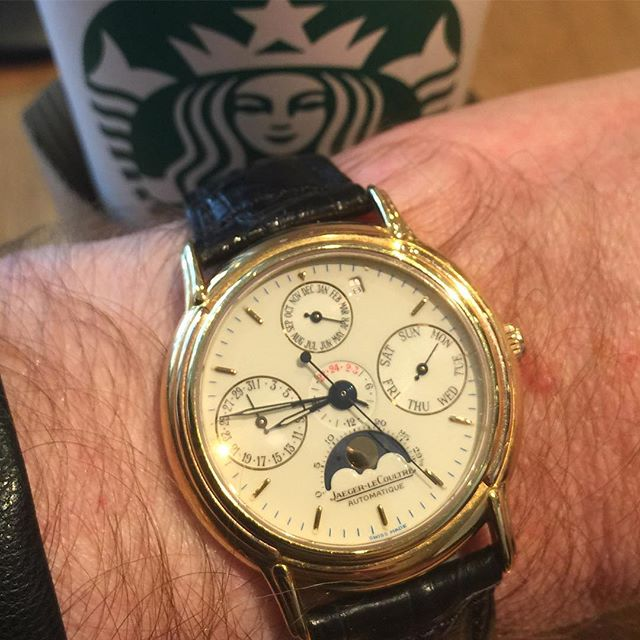

In [16]:
from IPython.display import Image
Image(publication.media['image'][0])

In [17]:
print(publication.text)

Full moon! #jaegerlecoultre #watch #mensstyle #moonphase #instagood


Thanks to the ``download`` method of ``Publication``, you can download the images or videos related to a publication. The ``download`` will try to download all media contents to have a local version of datas stored in ``media``.

In [18]:
publication.media

{'image': ['https://scontent.cdninstagram.com/vp/de0df4200dba4dfa7bb9122f87aebb78/5B9D8008/t51.2885-15/s640x640/sh0.08/e35/31033959_192224901413059_6878985776378413056_n.jpg'],
 'meta': None,
 'video': []}

In [19]:
publication.download(output_dir=None)

{'image': ['/Users/alexandre/Documents/Linkfluence/packages/radarly-py/docs/python/quickstart/31033959_192224901413059_6878985776378413056_n.jpg'],
 'video': []}

Several methods have been implemented to get more informations from the API about a publication. You can for example get all metadata informations with ``get_metadata`` method.

In [20]:
publication = Publication.fetch(2, {'query':'uid:r3_prod_2-600249433620525056'})[0]
metadata = publication.get_metadata()
metadata

<Metadata.did=r3_prod_2-600249433620525056>

In [21]:
metadata.draw_structure()

Metadata (Metadata)
 | did (str)
 | trends (list[dict])
 |  | date (datetime)
 |  | scores (dict)
 |  |  | favourite (int)
 |  |  | rt (int)


You can also retrieve the raw content of a publication (available for forum's or blog's publications).

In [22]:
publication = project.get_publications({'platforms': ['forum']})[0]
raw_content = publication.get_raw()
raw_content

{'text': '',
 'title': '超级特价出二手朗格232.032和139.035F，格拉苏蒂39-59，劳力士5443，欧米茄和真力时大金表 - 第12页'}